# Algerian Forest Fires Dataset

This consists of 244 instances, that regroup a data of 2 regions of Ageria. The Bejaia region, located in the northeast of Algeria, and the Sidi Bel-abbes region, located in northwest of Algeria.

There are 122 instances for each region.

The period from June 2012 to September 2012. There are 11 attributes and 1 output attribute.

These 244 instances have been labelled as 138 classes of fire, and 106 classes of not fire.

**Attribute Information**

1. Date: (DD/MM/YYYY)
1. Temp: temperature noon (temp max), ranging from 22 to 42

In [ ]:
10 // 3w

3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv('/Users/geraldo/Documents/Code/AIML/Personal Portofolio/1. Linear Regression/Algerian_forest_fires_dataset_UPDATE.csv', header= 1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [4]:
dataset[dataset.isnull().any(axis= 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
dataset.loc[:122, "Region"]= 0
dataset.loc[122:, "Region"]= 1
df=dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [7]:
df['Region']= df['Region'].astype(int)

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [9]:
df= df.dropna().reset_index(drop= True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df= df.drop(122).reset_index(drop= True)

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
df.columns= df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

# Change the required columns as integer data type

In [15]:
df['day']

0      01
1      02
2      03
3      04
4      05
       ..
238    26
239    27
240    28
241    29
242    30
Name: day, Length: 243, dtype: object

In [16]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]= df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [17]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

In [18]:
objects= [features for features in df.columns if df[features].dtypes == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [19]:
for obj in objects:
    if obj != 'Classes':
        df[obj]= df[obj].astype(float)
        

In [20]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

# EDA

In [21]:
df_copy= df.drop(['day', 'month', 'year'], axis= 1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df_copy['Classes']= np.where(df_copy['Classes'].str.contains('not fire'), 0, 1)

In [23]:
df_copy['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int64

In [24]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

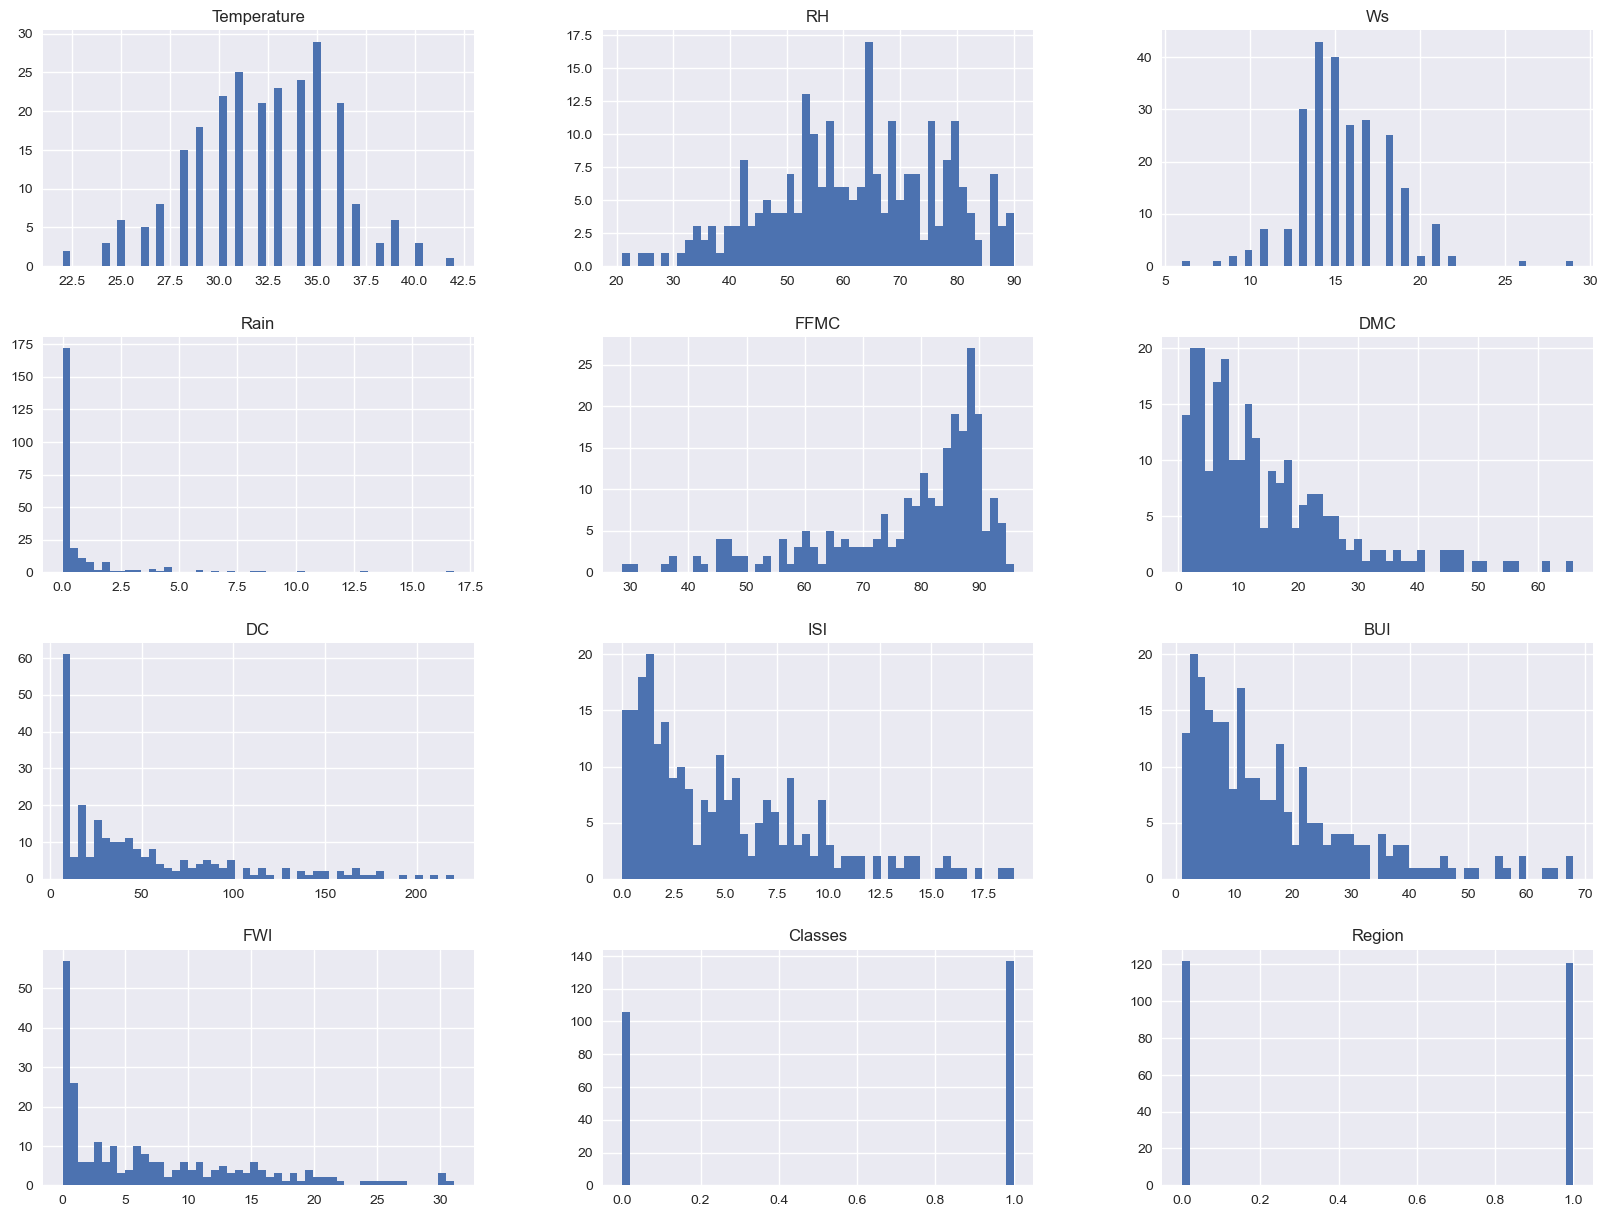

In [25]:
plt.style.use('seaborn-v0_8')
df_copy.hist(bins= 50, figsize= (20, 15))
plt.show()

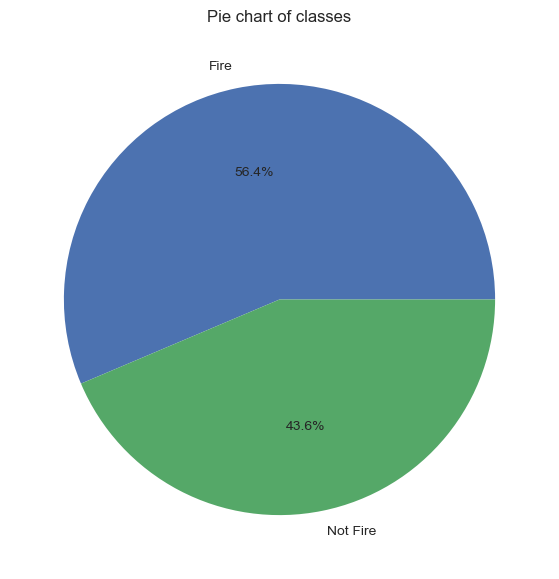

In [26]:
## PERCENTAGE FOR PIE CHART
plt.style.use('seaborn-v0_8')
percentage= df_copy['Classes'].value_counts(normalize= True)*100
class_label= ['Fire', 'Not Fire']
plt.figure(figsize= (12, 7))
plt.pie(percentage, labels= class_label, autopct= '%1.1f%%')
plt.title('Pie chart of classes')
plt.show()

## CORRELATION

<Axes: >

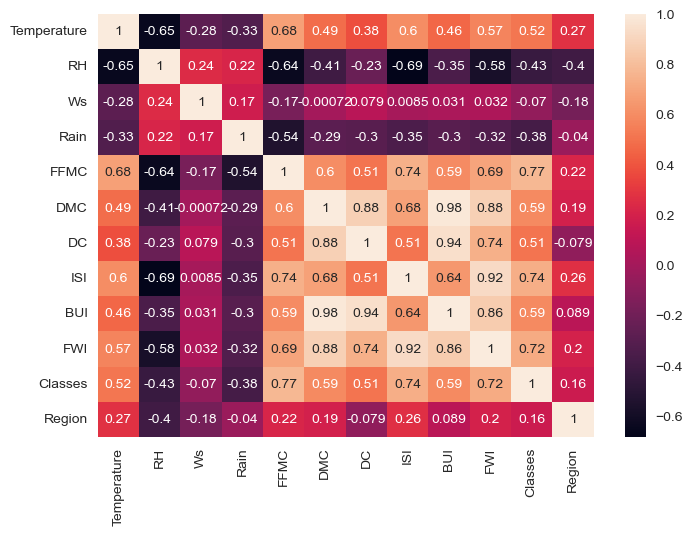

In [27]:
sns.heatmap(df_copy.corr(), annot= True)

# MODELLING

In [28]:
X= df_copy.drop('FWI', axis= 1)
y= df_copy['FWI']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

In [30]:
print(f'X train shape:', X_train.shape)
print(f'X test shape:', X_test.shape)
print(f'y train shape:', y_train.shape)
print(f'y test shape:', y_test.shape)

X train shape: (182, 11)
X test shape: (61, 11)
y train shape: (182,)
y test shape: (61,)


## Feature Selection

In [31]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


## Check for multicollinearity

<Axes: >

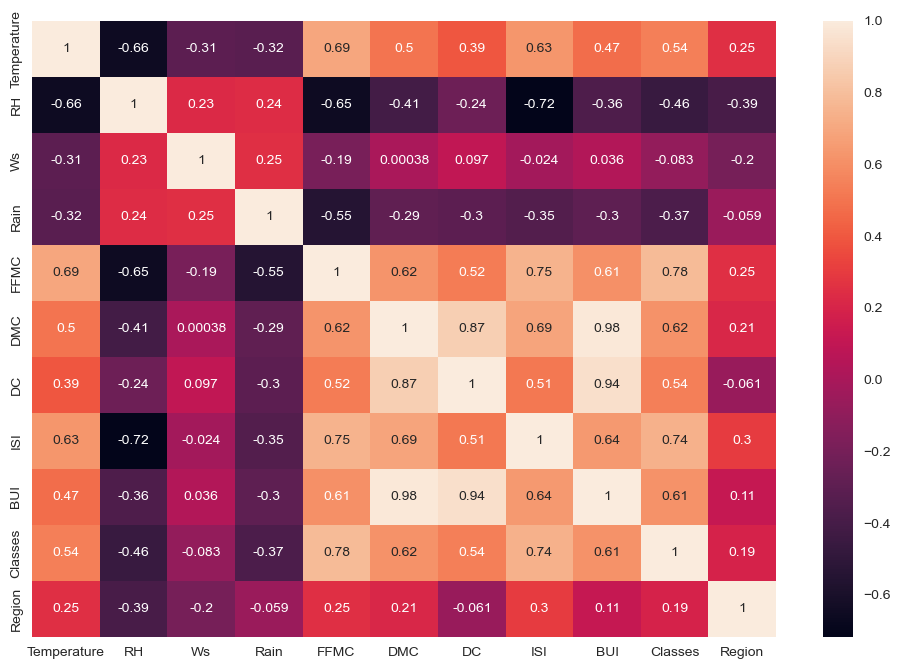

In [32]:
plt.figure(figsize= (12, 8))
sns.heatmap(X_train.corr(), annot= True)

In [33]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [34]:
## Threshold check
corr_features= correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [35]:
X_train.drop(corr_features, axis= 1, inplace= True)
X_test.drop(corr_features, axis= 1, inplace= True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Feature Scaling or Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Box Plots to Understand Effect of Standard Scaler

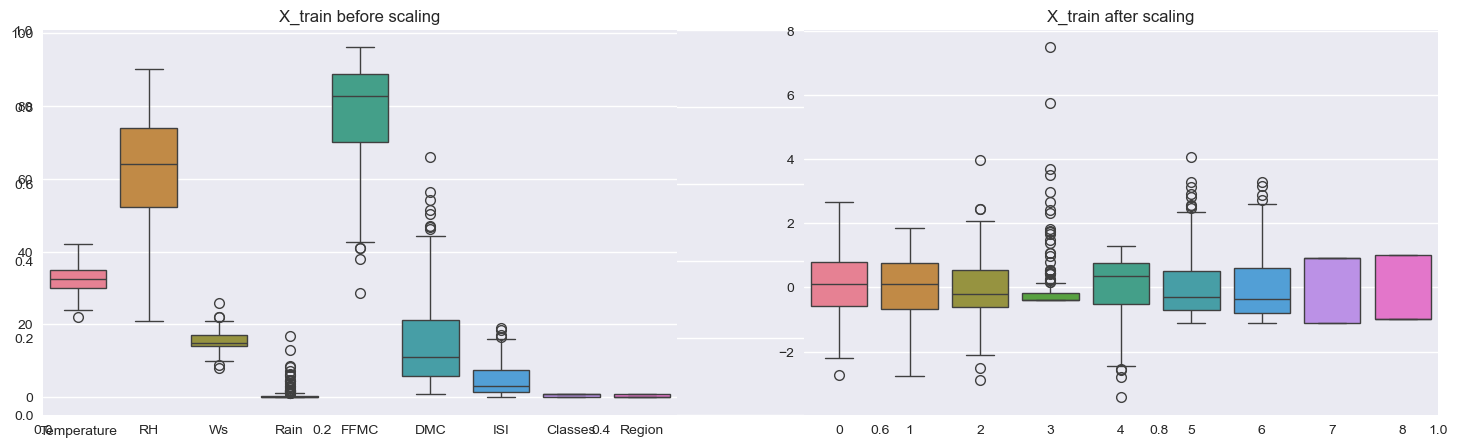

In [37]:
plt.subplots(figsize= (18, 5))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.title('X_train before scaling')

plt.subplot(1, 2, 2)
sns.boxplot(X_train_scaled)
plt.title('X_train after scaling')

plt.show()

# Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg= LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred= linreg.predict(X_test_scaled)

mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)

MAE:  0.546823646524999
R2:  0.9847657384266951


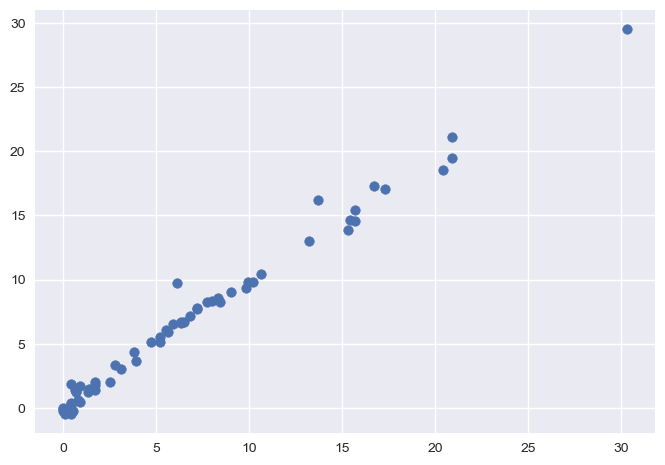

In [39]:
plt.scatter(y_test, y_pred)

# Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

lasso= Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred= lasso.predict(X_test_scaled)

mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)

MAE:  1.1331759949144082
R2:  0.9492020263112388


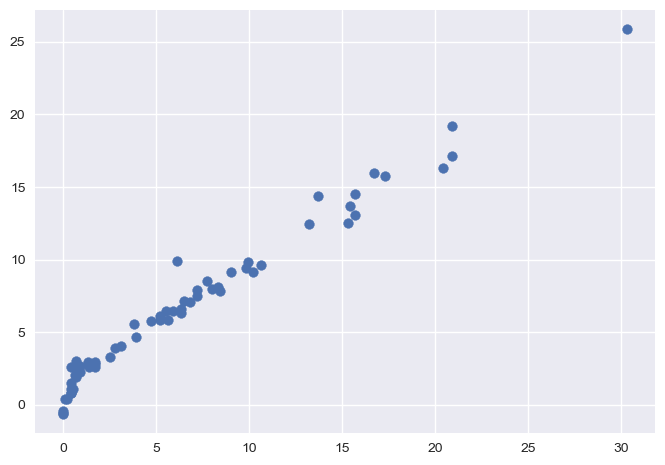

In [41]:
plt.scatter(y_test, y_pred)

# Cross Validation Lasso
What is Cross Validation?

Intiially if we have a dataset, we can divide it into: Train, and Test.

Train then will divided into two: Train, and Validation.

Train: Training the model.
Validation: Hyperparameter tuning 

In [42]:
from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv= 5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [43]:
lassocv.alpha_

0.05725391318234408

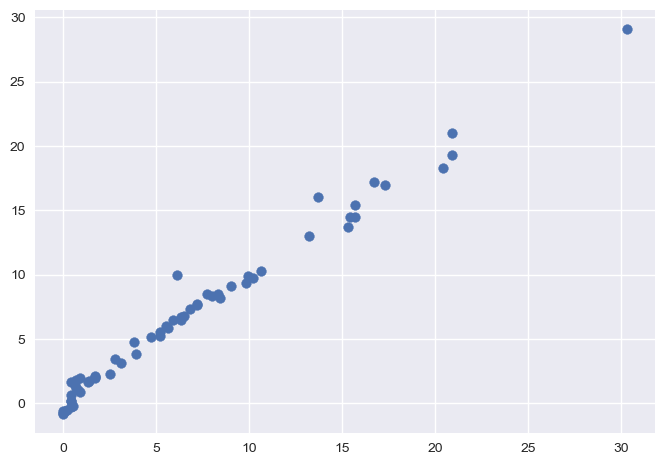

In [45]:
y_pred= lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [46]:
mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)

MAE:  0.6199701158263431
R2:  0.9820946715928275


# Ridge Regression Model

In [47]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred= ridge.predict(X_test_scaled)

mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)


MAE:  0.5642305340105711
R2:  0.9842993364555512


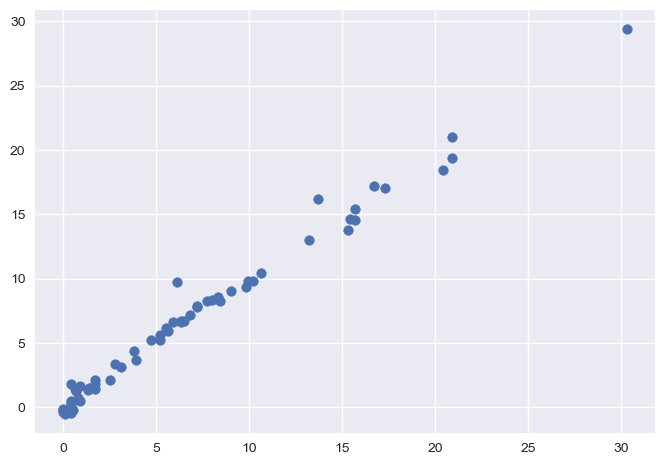

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
from sklearn.linear_model import RidgeCV
ridgecv= RidgeCV(cv= 5)
ridgecv.fit(X_train_scaled, y_train)

y_pred= ridgecv.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)

MAE:  0.5642305340105711
R2:  0.9842993364555512


In [50]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elastic Net

In [52]:
from sklearn.linear_model import ElasticNet
elasticnet= ElasticNet()
elasticnet.fit(X_train_scaled, y_train)

y_pred= elasticnet.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)

MAE:  1.8822353634896
R2:  0.8753460589519703


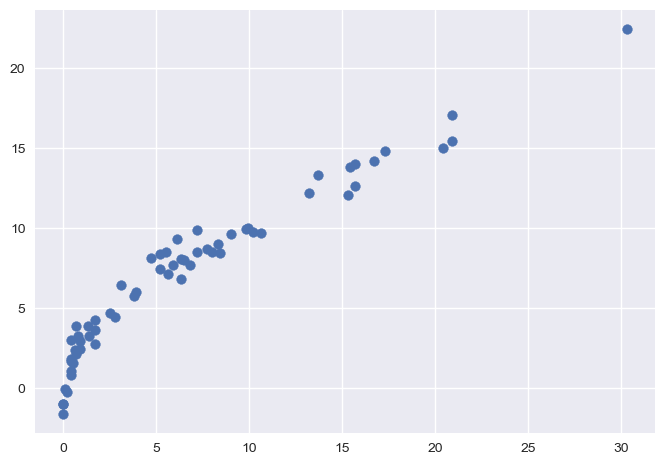

In [53]:
plt.scatter(y_test, y_pred)

# ElasticCV

In [54]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv= ElasticNetCV(cv= 5)
elasticnetcv.fit(X_train_scaled, y_train)

y_pred= elasticnetcv.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)

score= r2_score(y_test, y_pred)

print('MAE: ', mae)
print('R2: ', score)

MAE:  0.6575946731430904
R2:  0.9814217587854941


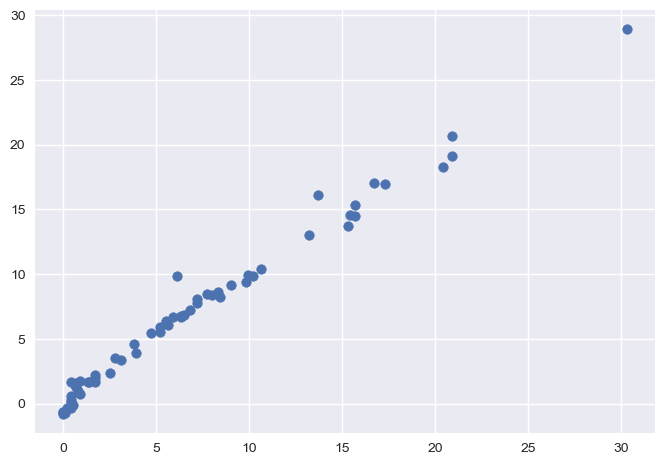

In [55]:
plt.scatter(y_test, y_pred)

In [56]:
## PICKLE!!!
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))